# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [54]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [22]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Страхование', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Информационные услуги', 'Наука', 'Подбор персонала', 'Маркетинг', 'Развлечения/Искусство', 'Государственная служба', 'Нефтегазовая промышленность', 'Образование', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Ресторанный бизнес/Общественное питание', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Информационные технологии', 'Строительство', 'Туризм', 'Недвижимость', 'Сельское хозяйство', 'Логистика', 'Сборочные производства', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [19]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
# Пропуски

# GEN_INDUSTRY [27420] - отрасль работы клиента
# GEN_TITLE  [27420] - должность
# ORG_TP_STATE  [27420] - форма собственности компании
# JOB_DIR  [27420] - направление деятельности в нутри компании
# -> тут явно не работающие - ниже есть запрос, правда один там видимо ошибся и отметил, что работает, хотя все эти поля не заполнены. 
#    Видимо можно заполнить как новая категория 'Не указано'

# WORK_TIME [27416] - время работы на текущем месте (в месяцах)
# -> видимо не работающие (проверил запросом ниже), которым можно проставить 0

# ORG_TP_FCAPITAL  [27425] - отношение к иностранному капиталу
# -> тут тоже не работающие, но 5-ро что-то все-таки указали что-то - думаю можно заполнить 'Без участия'

# REGION_NM [30131] - регион РФ -> можно определить по FACT_ADDRESS_PROVINCE - Там Новосибирская область у обоих

# PREVIOUS_CARD_NUM_UTILIZED -> пустые значения надо заполнить 0

# TP_PROVINCE [29543] - область торговой точки, где клиент брал последний кредит
# -> видимо тут не определена эта торговая точка. поставлю 'Не указана'

In [41]:
df[(df['SOCSTATUS_WORK_FL'] == 0) & (df['GEN_INDUSTRY'].isnull())].count()

AGREEMENT_RK                  2712
TARGET                        2712
AGE                           2712
SOCSTATUS_WORK_FL             2712
SOCSTATUS_PENS_FL             2712
GENDER                        2712
CHILD_TOTAL                   2712
DEPENDANTS                    2712
EDUCATION                     2712
MARITAL_STATUS                2712
GEN_INDUSTRY                     0
GEN_TITLE                        0
ORG_TP_STATE                     0
ORG_TP_FCAPITAL                  6
JOB_DIR                          0
FAMILY_INCOME                 2712
PERSONAL_INCOME               2712
REG_ADDRESS_PROVINCE          2712
FACT_ADDRESS_PROVINCE         2712
POSTAL_ADDRESS_PROVINCE       2712
TP_PROVINCE                   2696
REGION_NM                     2712
REG_FACT_FL                   2712
FACT_POST_FL                  2712
REG_POST_FL                   2712
REG_FACT_POST_FL              2712
REG_FACT_POST_TP_FL           2712
FL_PRESENCE_FL                2712
OWN_AUTO            

In [42]:
df[df['REGION_NM'].isnull()].T

,3099,17420
AGREEMENT_RK,61448233,61293307
TARGET,0,0
AGE,54,64
SOCSTATUS_WORK_FL,1,1
SOCSTATUS_PENS_FL,0,0
GENDER,1,1
CHILD_TOTAL,2,1
DEPENDANTS,0,0
EDUCATION,Среднее специальное,Среднее специальное
MARITAL_STATUS,Состою в браке,Разведен(а)


In [47]:
print(df[df['WORK_TIME'].isnull()]['AGREEMENT_RK'].count())
df[(df['SOCSTATUS_WORK_FL'] == 0) & (df['WORK_TIME'].isnull())]['AGREEMENT_RK'].count()

2717


2716

In [48]:
df[df['FACT_ADDRESS_PROVINCE'] == 'Новосибирская область']['REGION_NM'].head()

71     ЗАПАДНО-СИБИРСКИЙ
222    ЗАПАДНО-СИБИРСКИЙ
240    ЗАПАДНО-СИБИРСКИЙ
241    ЗАПАДНО-СИБИРСКИЙ
356    ЗАПАДНО-СИБИРСКИЙ
Name: REGION_NM, dtype: object

In [51]:
df[~ (df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE']) & ~(df['TP_PROVINCE'].isnull())]['AGREEMENT_RK'].count()

2067

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
# категориальные признаки есть, превратить их в столбцы с помощью функции get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [52]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].replace(np.NaN, 0.0)
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].replace(np.NaN, 'Не указано')
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].replace(np.NaN, 'Не указано')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].replace(np.NaN, 'Не указано')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].replace(np.NaN, 'Не указано')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].replace(np.NaN, 'Без участия')
    df_output['WORK_TIME'] = df_output['WORK_TIME'].replace(np.NaN, 0.0)
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].replace(np.NaN, 'Не указано')
    df_output['REGION_NM'] = df_output['REGION_NM'].replace(np.NaN, 'ЗАПАДНО-СИБИРСКИЙ')
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 
                                                   'GEN_INDUSTRY', 'GEN_TITLE', 
                                                   'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 
                                                   'JOB_DIR', 'FAMILY_INCOME', 
                                                   'REG_ADDRESS_PROVINCE', 
                                                   'FACT_ADDRESS_PROVINCE', 
                                                   'POSTAL_ADDRESS_PROVINCE', 
                                                   'TP_PROVINCE', 'REGION_NM'])
        
    
    return df_output

In [55]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [57]:
target = 'TARGET'
y = df_train_preproc[target]
x = df_train_preproc.drop(target, axis=1)
y_test = df_test_preproc[target]
x_test = df_test_preproc.drop(target, axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [58]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

/home/ivan/Projects/neuronet/face/landmarks_detection/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc = dtc.predict(x_test)
predict_proba_dtc = dtc.predict_proba(x_test)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict_rfc = rfc.predict(x_test)
predict_proba_rfc = rfc.predict_proba(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
predict_proba_lr = lr.predict_proba(x_test)

In [60]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    
print("DecisionTreeClassifier:")
print(" - accuracy", accuracy_score(y_test, predict_dtc))
print(" - precision", precision_score(y_test, predict_dtc))
print(" - recall", recall_score(y_test, predict_dtc))

print("RandomForestClassifier:")
print(" - accuracy", accuracy_score(y_test, predict_rfc))
print(" - precision", precision_score(y_test, predict_rfc))
print(" - recall", recall_score(y_test, predict_rfc))

print("LogisticRegression:")
print(" - accuracy", accuracy_score(y_test, predict_lr))
print(" - precision", precision_score(y_test, predict_lr))
print(" - recall", recall_score(y_test, predict_lr))

DecisionTreeClassifier:
 - accuracy 0.7992117363696081
 - precision 0.15849056603773584
 - recall 0.15135135135135136
RandomForestClassifier:
 - accuracy 0.8767243266914824
 - precision 0.3333333333333333
 - recall 0.014414414414414415
LogisticRegression:
 - accuracy 0.877819137289249
 - precision 0.2857142857142857
 - recall 0.0036036036036036037


(-0.01, 1.01)

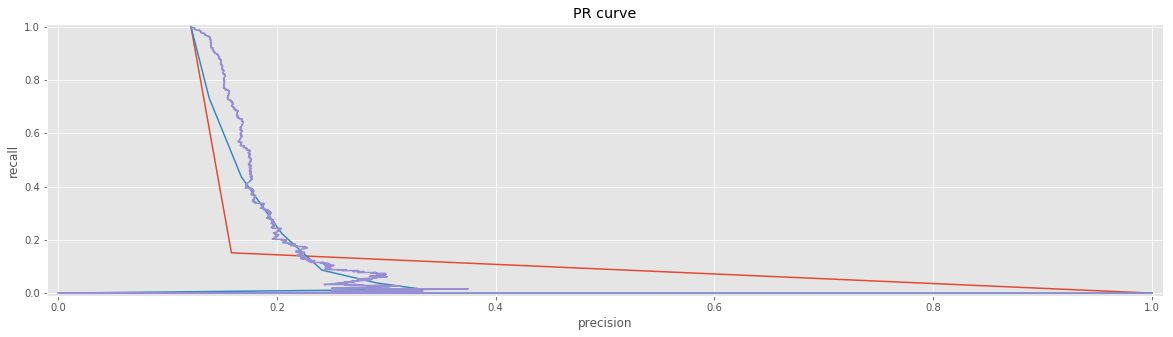

In [61]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
from sklearn.metrics import precision_recall_curve
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_proba_dtc[:,1]) 
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, predict_proba_rfc[:,1]) 
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, predict_proba_lr[:,1]) 

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

DecisionTreeClassifier ROC_AUC: 0.5200924254264234
RandomForestClassifier ROC_AUC: 0.5867263075637952
LogisticRegression ROC_AUC: 0.636378252629499


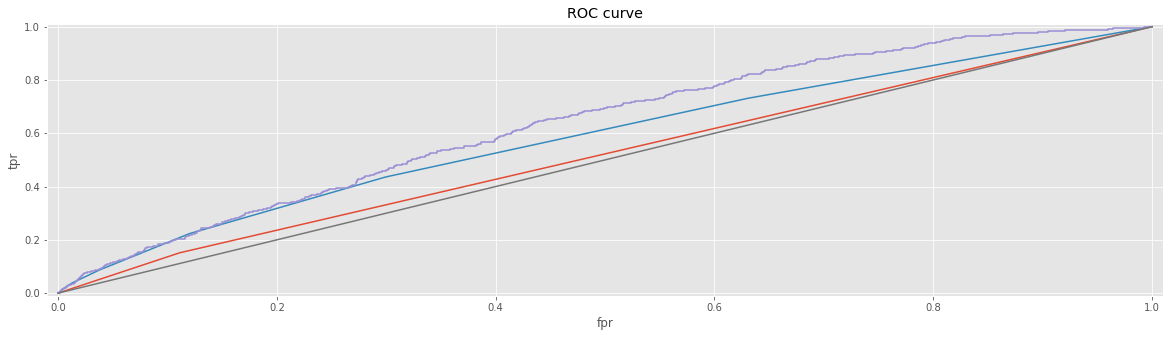

In [62]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])
plt.figure(figsize=(20, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('DecisionTreeClassifier ROC_AUC: {}'.format(roc_auc_score(y_test, predict_proba_dtc[:,1])))
print('RandomForestClassifier ROC_AUC: {}'.format(roc_auc_score(y_test, predict_proba_rfc[:,1])))
print('LogisticRegression ROC_AUC: {}'.format(roc_auc_score(y_test, predict_proba_lr[:,1])))


In [64]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
print('DecisionTreeClassifier ROC_AUC: {}'.format(np.mean(
    cross_val_score(dtc, x, y, scoring='roc_auc', cv=cv.get_n_splits()))))
print('RandomForestClassifier ROC_AUC: {}'.format(np.mean(
    cross_val_score(rfc, x, y, scoring='roc_auc', cv=cv.get_n_splits()))))
print('LogisticRegression ROC_AUC: {}'.format(np.mean(
    cross_val_score(lr, x, y, scoring='roc_auc', cv=cv.get_n_splits()))))

DecisionTreeClassifier ROC_AUC: 0.533435406813098
RandomForestClassifier ROC_AUC: 0.5938649497675754
LogisticRegression ROC_AUC: 0.6580652096749814


In [67]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
best = LogisticRegression()
best.fit(x, y)
predict_proba_best = best.predict_proba(x_test)

/home/ivan/Projects/neuronet/face/landmarks_detection/venv/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [68]:
# Померить roc_auc на тесте
print('ROC_AUC test: {}'.format(roc_auc_score(y_test, predict_proba_best[:,1])))

ROC_AUC test: 0.6426782714918309
